<h3 align="right"> October 19, 2019  </h3> 

<h3 align="center"> Portfolio Theory and Risk Management I </h3> 

<h3 align="center"> HW 3 Solution.  </h3> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))

# 2. Investigating Momentum

In [2]:
factor_df = pd.read_excel('factor_model_data_with_momentum.xls', 'Factor Data')
factor_df = factor_df.set_index('Date')
factor_df['r_mkt_excess'] = factor_df['r_mkt'] - factor_df['r_f']
factor_df.head(2)

,r_mkt,r_f,rx_size,rx_value,rx_momentum,r_mkt_excess
Date,,,,,,
1927-01-31,-0.0006,0.0025,-0.0056,0.0483,0.0044,-0.0031
1927-02-28,0.0418,0.0026,-0.0010,0.0317,-0.0201,0.0392


In [3]:
industry_df = pd.read_excel('factor_model_data_with_momentum.xls', 'Industry Portfolios')
industry_df = industry_df.set_index('Date')
industry_df.head(2)

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1927-01-31,-0.0084,0.0057,-0.0035,0.0187,0.0967,0.0408,-0.0106,0.0505,0.0023,-0.0150,...,0.0188,0.0208,-0.0145,-0.0260,0.0144,-0.1793,-0.0270,0.0152,-0.0238,-0.0396
1927-02-28,0.0442,0.1283,0.0149,0.0164,0.0141,0.0457,0.0277,0.0171,0.0969,0.0774,...,0.0397,0.0890,0.0485,0.0546,0.0518,0.0349,0.0347,0.0686,0.0297,0.0028


In [4]:
momentum_df = pd.read_excel('factor_model_data_with_momentum.xls', 'Momentum Deciles')
momentum_df = momentum_df.set_index('Date')
momentum_df.columns = ['mom1', 'mom2', 'mom3', 'mom4', 'mom5', 'mom6', 'mom7', 'mom8', 'mom9', 'mom10']
momentum_df.head(2)

,mom1,mom2,mom3,mom4,mom5,mom6,mom7,mom8,mom9,mom10
Date,,,,,,,,,,
1927-01-31,-0.0332,-0.0462,0.0266,-0.0032,-0.0041,0.0096,0.0077,0.0036,-0.0043,-0.0024
1927-02-28,0.0749,0.0601,0.0833,0.0751,0.0380,0.0416,0.0281,0.0328,0.0421,0.0696


In [5]:
momsize_df = pd.read_excel('factor_model_data_with_momentum.xls', 'Momentum by Size')
momsize_df = momsize_df.set_index('Date')
momsize_df.head(2)

,Small Down,Small Up,Big Down,Big Up
Date,,,,
1927-01-31,-0.0009,0.0040,-0.0040,0.0000
1927-02-28,0.0726,0.0605,0.0727,0.0447


## 2.1. Is momentum still profitable?

## (a)
**Using the data provided, fill in Table 1 with the appropriate stats for** $\tilde{r}^{mom:FF}$


In [6]:
df_1 = factor_df.loc['1927-01-01':'2019-12-31']
df_2 = factor_df.loc['1927-01-01':'1933-12-31']
df_3 = factor_df.loc['1994-01-01':'2008-12-31']
df_4 = factor_df.loc['2009-01-01':'2019-12-31']

dates = ['1927-2015', '1927-1933', '1994-2008', '2009-2019']
Table_1 = pd.DataFrame(columns=['Subsample', 'mean', 'vol', 'Sharpe', 'skewness', 
                                'corr_to_r_m', 'corr_to_r_v'])
Table_1['Subsample'] = dates
Table_1 = Table_1.set_index('Subsample')

def fill_table(table, subsample, df, param):
    table.loc[subsample]['mean'] = round(df[param].mean(), 5)
    table.loc[subsample]['vol'] = round(df[param].std(),5)
    table.loc[subsample]['Sharpe'] = round(df[param].mean() / df[param].std(), 5)
    table.loc[subsample]['skewness'] = round(df[param].skew(), 5)
    table.loc[subsample]['corr_to_r_m'] = round(df[param].corr(df['r_mkt_excess']), 5)
    table.loc[subsample]['corr_to_r_v'] = round(df[param].corr(df['rx_value']), 5)
    return table

fill_table(Table_1, dates[0], df_1, 'rx_momentum')
fill_table(Table_1, dates[1], df_2, 'rx_momentum')
fill_table(Table_1, dates[2], df_3, 'rx_momentum')
fill_table(Table_1, dates[3], df_4, 'rx_momentum')
printmd('**Table 1: Momentum performance over time (monthly, in % (except of skewness)).**', color='blue')
display(Table_1)

<span style='color:blue'>**Table 1: Momentum performance over time (monthly, in % (except of skewness)).**</span>

,mean,vol,Sharpe,skewness,corr_to_r_m,corr_to_r_v
Subsample,,,,,,
1927-2015,0.00664,0.04696,0.14129,-3.03416,-0.33997,-0.41397
1927-1933,0.00885,0.09681,0.09137,-3.33539,-0.67686,-0.78801
1994-2008,0.0086,0.05052,0.17025,-0.55934,-0.2332,-0.12646
2009-2019,-0.0014,0.04713,-0.02979,-3.24626,-0.34707,-0.42736


**(b) Has momentum changed much over time, as seen through these subsample statistics?**

In [7]:
printmd('**Momentum performance HAS CHANGED over subsamples, moreover, patterns of behavior changed differently between different periods.**',color='blue') 
printmd('**We can see that the BEST PERFORMANCE momentum has showed during 1994-2008, as it corresponds to the highest Sharpe Ratio, lowest volatiility and highest mean return. Similar, but a little bit worse performance in terms of mean return momentum has shown during 1927-2015.**',color='blue')
printmd('**The WORST PERFORMANCE momentum has shown during 2009-2019: negative Sharpe Ratio and mean, volatility is comparable to other subsamples.**', color='blue')
printmd('**During all subsamples momentum showed negative correlation with market and value portfolios.**', color='blue')

<span style='color:blue'>**Momentum performance HAS CHANGED over subsamples, moreover, patterns of behavior changed differently between different periods.**</span>

<span style='color:blue'>**We can see that the BEST PERFORMANCE momentum has showed during 1994-2008, as it corresponds to the highest Sharpe Ratio, lowest volatiility and highest mean return. Similar, but a little bit worse performance in terms of mean return momentum has shown during 1927-2015.**</span>

<span style='color:blue'>**The WORST PERFORMANCE momentum has shown during 2009-2019: negative Sharpe Ratio and mean, volatility is comparable to other subsamples.**</span>

<span style='color:blue'>**During all subsamples momentum showed negative correlation with market and value portfolios.**</span>

**(c) Does this data support AQRs argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs - would there still be evidence here that momentum is valuable?**

In [8]:
printmd('**Momentum has a strong negative correlation with the market, and thus, this strategy can be used to reduce portfolio volatility even if it does not lead to much higher portfolio returns.**',color='blue')

<span style='color:blue'>**Momentum has a strong negative correlation with the market, and thus, this strategy can be used to reduce portfolio volatility even if it does not lead to much higher portfolio returns.**</span>

## 2.2. The case is about whether a long-only implementation of momentum is valuable.

## (a)
**Fill out Table 2 using the full sample of data**

In [9]:
long_df = 1/2 * ( momsize_df['Big Up'] + momsize_df['Small Up'] ) - factor_df['r_f']
long_df = pd.DataFrame(long_df, columns=['r_mom_U:FF'])
long_df['r_mkt_excess'] = factor_df['r_mkt_excess'].copy()
long_df['rx_value'] = factor_df['rx_value'].copy()

In [10]:
strategies = ['Long-and-short, r_mom:FF', 'Long-only, r_momU:FF']
Table_2 = pd.DataFrame(columns=['mean', 'vol', 'Sharpe', 'skewness', 
                               'corr_to_r_m', 'corr_to_r_v'])
Table_2['Construction'] = strategies
Table_2 = Table_2.set_index('Construction')

fill_table(Table_2, strategies[0], factor_df, 'rx_momentum')
fill_table(Table_2, strategies[1], long_df, 'r_mom_U:FF')
printmd('**Table 2: Long-only momentum performance 1927-2019 (monthly, in % (except of skewness)).**', color='blue')
display(Table_2)

<span style='color:blue'>**Table 2: Long-only momentum performance 1927-2019 (monthly, in % (except of skewness)).**</span>

,mean,vol,Sharpe,skewness,corr_to_r_m,corr_to_r_v
Construction,,,,,,
"Long-and-short, r_mom:FF",0.00664,0.04696,0.14129,-3.03416,-0.33997,-0.41397
"Long-only, r_momU:FF",0.01123,0.06136,0.18296,-0.00979,0.93463,0.21093


## (b)
**Is long-only momentum as attractive as long-short momentum with respect to mean, volatility,
and Sharpe Ratio?**

In [11]:
printmd('**Long-only momentum strategy shows higher mean return accompanied by higher volatilty. However, its Sharpe Ratio is still higher than Sharpe Ratio for Long-and-short momentum strategy, which makes Long-only momentum a more attractive strategy in terms of Sharpe Ratio and mean, but not in terms of volatility.**',color='blue')

<span style='color:blue'>**Long-only momentum strategy shows higher mean return accompanied by higher volatilty. However, its Sharpe Ratio is still higher than Sharpe Ratio for Long-and-short momentum strategy, which makes Long-only momentum a more attractive strategy in terms of Sharpe Ratio and mean, but not in terms of volatility.**</span>

## (c)
**Is long-only momentum as diversifying as long-short momentum with respect to market
and value premia?**

In [84]:
printmd('**We can see that Long-only momentum strategy is correlated with value portfolio and very highly correlated with the market, and thus, it is not a good idea to use it for diversification purposes. Long-and-short momentum strategy serves much better for this purpose.**',color='blue')

<span style='color:blue'>**We can see that Long-only momentum strategy is correlated with value portfolio and very highly correlated with the market, and thus, it is not a good idea to use it for diversification purposes. Long-and-short momentum strategy serves much better for this purpose.**</span>

## (d)
**Show a plot of the cumulative product of** $1+ \tilde{r}^{mom:FF}$ **and** $1+ \tilde{r}^{momU:FF}$ **over the 2006-2019 subsample.**

<span style='color:blue'>**We can see from the graph that Long-Only momentum strategy shows much higher cumulative product return than Long-And-Short momentum strategy.**</span>

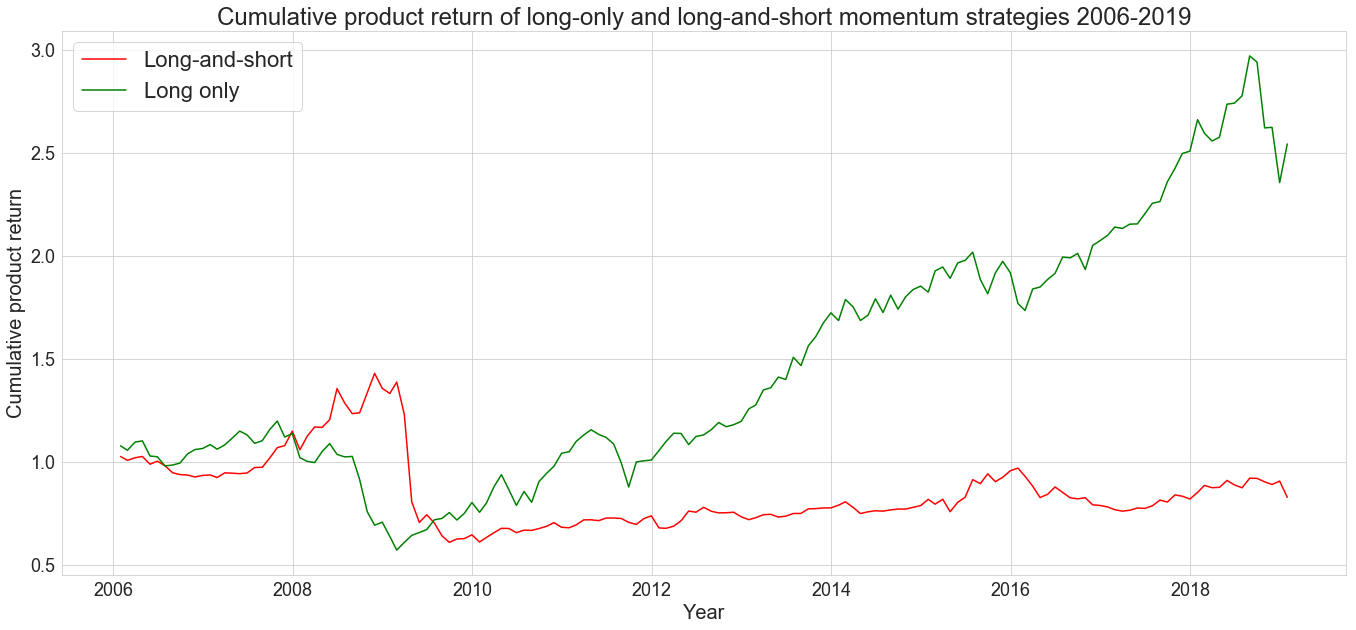

In [13]:
cumprod_mom_FF = (factor_df['rx_momentum']['2006-01-01':'2019-01-31'] + 1).cumprod()
cumprod_mom_UFF = (long_df['r_mom_U:FF']['2006-01-01':'2019-01-31'] + 1).cumprod()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(23, 10))
ax.set_title('Cumulative product return of long-only and long-and-short momentum strategies 2006-2019', fontsize=24)
ax.plot(cumprod_mom_FF, color='red', label='Long-and-short')
ax.plot(cumprod_mom_UFF, color='green', label='Long only')
ax.legend(fontsize=22, loc='upper left')
plt.xlabel('Year', fontsize=20)
plt.ylabel('Cumulative product return', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

printmd('**We can see from the graph that Long-Only momentum strategy shows much higher cumulative product return than Long-And-Short momentum strategy.**',color='blue')

## 2.3. Is momentum just data mining, or is it a robust strategy?

## (a)
**Compare all three constructions, (in the full-sample period,) by filling out the stats in the
table below.**

In [14]:
strategies = ['r_mom:FF', 'r_mom', 'r_mom10-1']
Table_3 = pd.DataFrame(columns=['mean', 'vol', 'Sharpe', 'skewness', 
                               'corr_to_r_m', 'corr_to_r_v'])
Table_3['Construction'] = strategies
Table_3 = Table_3.set_index('Construction')

In [15]:
r_mom_FF = factor_df

r_mom = 1/3*(momentum_df['mom8'] + momentum_df['mom9'] + momentum_df['mom10']) - 1/3*(momentum_df['mom1'] + momentum_df['mom2'] + momentum_df['mom3'])
r_mom = pd.DataFrame(r_mom, columns=['r_mom'])
r_mom['r_mkt_excess'] = factor_df['r_mkt_excess'].copy()
r_mom['rx_value'] = factor_df['rx_value'].copy()

r_mom_10_1 = momentum_df['mom10'] - momentum_df['mom1']
r_mom_10_1 = pd.DataFrame(r_mom_10_1, columns=['r_mom_10_1'])
r_mom_10_1['r_mkt_excess'] = factor_df['r_mkt_excess'].copy()
r_mom_10_1['rx_value'] = factor_df['rx_value'].copy()

In [16]:
fill_table(Table_3, strategies[0], r_mom_FF, 'rx_momentum')
fill_table(Table_3, strategies[1], r_mom, 'r_mom')
fill_table(Table_3, strategies[2], r_mom_10_1, 'r_mom_10_1')
printmd('**Table 3: Robustness of momentum construction (monthly, in % (except of skewness)**', color='blue')
display(Table_3)

<span style='color:blue'>**Table 3: Robustness of momentum construction (monthly, in % (except of skewness)**</span>

,mean,vol,Sharpe,skewness,corr_to_r_m,corr_to_r_v
Construction,,,,,,
r_mom:FF,0.00664,0.04696,0.14129,-3.03416,-0.33997,-0.41397
r_mom,0.00686,0.05433,0.12624,-2.66523,-0.37451,-0.40008
r_mom10-1,0.0118,0.07779,0.15174,-2.31577,-0.36687,-0.40458


## (b)
**Based on the stats above, how sensitive are the momentum returns to segmenting for size
as FF do, versus just doing the unsegmented, three-decile construction in** $\tilde{r}^{mom}$ ?

In [17]:
printmd("**The momentum returns is not sensitive to size, because the Fama French momentum return is not higher than the one from three-decile portfolio in the long run. However, segmenting for size does lead to relatively lower volitilities.**", color = "blue")

<span style='color:blue'>**The momentum returns is not sensitive to size, because the Fama French momentum return is not higher than the one from three-decile portfolio in the long run. However, segmenting for size does lead to relatively lower volitilities.**</span>

## (c) 
**Based on the stats above, should AQR's retail product consider using a 1-decile construction
as in** $\tilde{r}^{mom10:1}$ **?**

In [18]:
printmd('**We can see from the statistics above that 1-decile construction has higher mean and Sharpe ratio, it also has high negative correlation with the market and value portfolios. That is why we can conclude that it is reasonable for AQR to CONSIDER usage of 1-decile construction.**',color='blue')

<span style='color:blue'>**We can see from the statistics above that 1-decile construction has higher mean and Sharpe ratio, it also has high negative correlation with the market and value portfolios. That is why we can conclude that it is reasonable for AQR to CONSIDER usage of 1-decile construction.**</span>

**Do the tradeoffs between the 3-decile and 1-decile constructions line up with the theoretical
tradeoffs we discussed in the lecture?**

In [19]:
printmd("**The 1-decile construction has a higher excess return, however, higher volitilities as well due to less diversification, compared to the 3-decile construction. It lines up with the theoretical tradeoff discussed in lecture.**", color = "blue")

<span style='color:blue'>**The 1-decile construction has a higher excess return, however, higher volitilities as well due to less diversification, compared to the 3-decile construction. It lines up with the theoretical tradeoff discussed in lecture.**</span>

## 2.4. In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?

In [20]:
printmd("**By regulation, the AQR retail product is restricted to long positions and only to large stocks, and therefore, it does not capture the feature of Fama-French construction with regard to its short positions and inclusive to small caps. Therefore, the lack in diversification may lead to higher volitilities. I would suggest AQR to adjust their portfolio based on momentum deciles.**", color = "blue")

<span style='color:blue'>**By regulation, the AQR retail product is restricted to long positions and only to large stocks, and therefore, it does not capture the feature of Fama-French construction with regard to its short positions and inclusive to small caps. Therefore, the lack in diversification may lead to higher volitilities. I would suggest AQR to adjust their portfolio based on momentum deciles.**</span>

# 3. Momentum in the LFPM

## 3.1. Calculate the factor premia (lambda) from the sample averages of the factors

In [22]:
lambda_momFF = factor_df['rx_momentum'].mean()
lambda_s = factor_df['rx_size'].mean()
lambda_v = factor_df['rx_value'].mean()
lambda_m = factor_df['r_mkt_excess'].mean()

lambdas = np.array([lambda_m, lambda_s, lambda_v, lambda_momFF])
lambdas_df = pd.DataFrame(lambdas, index=['momentum', 'size', 'value', 'mkt'], columns=['factor premia'])
lambdas_df["factor premia"] = lambdas_df["factor premia"].map('{:,.4f}'.format)

printmd('**Factor premia obtained from the sample averages of the factors**', color='blue')
display(lambdas_df)

<span style='color:blue'>**Factor premia obtained from the sample averages of the factors**</span>

,factor premia
momentum,0.0038
size,0.0020
value,0.0035
mkt,0.0066


## 3.2. For each of the n = 30 test portfolios, run the LFPM time-series regression:

$$\tilde{r}_t^i = \alpha_i + \beta^{i,m}\tilde{r}_t^m + \beta^{i,s}\tilde{r}_t^s + \beta^{i,v}\tilde{r}_t^v + \beta^{i,mom:FF}\tilde{r}_t^{mom:FF} + \epsilon_t^i$$

In [23]:
portfolios_df = industry_df.copy()
portfolios_df['mkt_excess'] = factor_df['r_mkt_excess']
portfolios_df['value'] = factor_df['rx_value']
portfolios_df['size'] = factor_df['rx_size']
portfolios_df['momentum'] = factor_df['rx_momentum']
print(portfolios_df.shape)
portfolios_df.head(3)

(1112, 34)


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Trans,Whlsl,Rtail,Meals,Fin,Other,mkt_excess,value,size,momentum
Date,,,,,,,,,,,,,,,,,,,,,
1927-01-31,-0.0084,0.0057,-0.0035,0.0187,0.0967,0.0408,-0.0106,0.0505,0.0023,-0.0150,...,0.0144,-0.1793,-0.0270,0.0152,-0.0238,-0.0396,-0.0031,0.0483,-0.0056,0.0044
1927-02-28,0.0442,0.1283,0.0149,0.0164,0.0141,0.0457,0.0277,0.0171,0.0969,0.0774,...,0.0518,0.0349,0.0347,0.0686,0.0297,0.0028,0.0392,0.0317,-0.0010,-0.0201
1927-03-31,0.0209,-0.1356,0.0551,0.0102,-0.0028,-0.0008,0.0090,0.0101,0.0607,-0.0539,...,0.0106,-0.2047,-0.0030,-0.0242,0.0136,0.0218,-0.0017,-0.0267,-0.0160,0.0359


In [24]:
reg_results = pd.DataFrame(index = industry_df.columns, columns = ["alpha", "beta_mkt", "beta_value", "beta_size", "beta_mom", "abs_resid"])
factors = ['mkt_excess','value','size','momentum']
rhs = sm.add_constant(portfolios_df[factors])
for portfolio in reg_results.index:
    lhs = portfolios_df[portfolio]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    reg_results.loc[portfolio, 'alpha'] = res.params["const"]
    reg_results.loc[portfolio, 'beta_mkt'] = res.params['mkt_excess']
    reg_results.loc[portfolio, 'beta_value'] = res.params['value']
    reg_results.loc[portfolio, 'beta_size'] = res.params['size']
    reg_results.loc[portfolio, 'beta_mom'] = res.params['momentum']
    reg_results.loc[portfolio, 'abs_resid'] = res.resid.abs().mean()
reg_results

,alpha,beta_mkt,beta_value,beta_size,beta_mom,abs_resid
Food,0.00677562,0.749915,0.0460662,-0.13117,0.0178308,0.0191602
Beer,0.00638137,0.89562,0.195505,0.221738,0.141272,0.0336761
Smoke,0.00902703,0.643422,0.0621349,-0.203292,-0.0135621,0.0350301
Games,0.00642653,1.24092,0.108467,0.390183,-0.149054,0.0341483
Books,0.00383958,0.993359,0.165518,0.361578,-0.0304185,0.0283146
Hshld,0.00581372,0.921699,-0.0157988,-0.0826963,0.0496324,0.0238152
Clths,0.00643224,0.721481,-0.0782455,0.427085,-0.0615915,0.027889
Hlth,0.00797675,0.880753,-0.176577,-0.0881812,0.0273937,0.0239144
Chems,0.00668317,1.05364,-0.000755335,-0.150933,-0.0240006,0.0215656
Txtls,0.00472603,0.941546,0.277403,0.545577,-0.152685,0.0292073


## 3.3. Use your estimates for BETA and LAMBDA to calculate the LFPM-implied expected excess return for each test portfolio

In [25]:
LFPM_df = pd.DataFrame()
LFPM_df = pd.DataFrame(index = reg_results.index, columns=['LFPM-implied excess return'])
for portfolio in reg_results.index:
    LFPM_df.loc[portfolio] = reg_results.loc[portfolio]['beta_mom']*lambda_momFF + \
    reg_results.loc[portfolio]['beta_value']*lambda_v + reg_results.loc[portfolio]['beta_size']*lambda_s + \
    reg_results.loc[portfolio]['beta_mkt']*lambda_m
printmd('**LFPM-implied expected excess return for each test portfolio**',color='blue')    
LFPM_df['LFPM-implied excess return'] = LFPM_df['LFPM-implied excess return'].map('{:,.4f}'.format)
display(LFPM_df)

<span style='color:blue'>**LFPM-implied expected excess return for each test portfolio**</span>

,LFPM-implied excess return
Food,0.0029
Beer,0.0055
Smoke,0.0022
Games,0.0049
Books,0.0049
Hshld,0.0036
Clths,0.0029
Hlth,0.0028
Chems,0.0036
Txtls,0.0047


## 3.4. Calculate the sample average of the excess return on each test portfolio

In [27]:
exc_ret_df = pd.DataFrame()
exc_ret_df = pd.DataFrame(index=reg_results.index, columns=['Sample average of the excess return'])
for portfolio in exc_ret_df.index:
    exc_ret_df.loc[portfolio] = portfolios_df[portfolio].mean()
printmd('**Sample average of the excess return for each test portfolio**',color='blue')   
exc_ret_df['Sample average of the excess return'] = exc_ret_df['Sample average of the excess return'].map('{:,.4f}'.format)
display(exc_ret_df)

<span style='color:blue'>**Sample average of the excess return for each test portfolio**</span>

,Sample average of the excess return
Food,0.0097
Beer,0.0119
Smoke,0.0112
Games,0.0114
Books,0.0088
Hshld,0.0094
Clths,0.0094
Hlth,0.0107
Chems,0.0102
Txtls,0.0094


## 3.5. Make a scatter plot for the 30 test portfolios, with their LFPM-implied premia:

In [70]:
factors1 = np.array([lambda_m, lambda_s, lambda_v, lambda_momFF])
factors2 = np.array([lambda_m, lambda_s, lambda_v, lambda_momFF])
factors = np.concatenate([factors1.reshape(-1,1), factors2.reshape(-1,1)], axis=1)
factors_df = pd.DataFrame(factors, index=['momentum', 'size', 'value', 'mkt'], 
                          columns=['factors1', 'factors2'])

ret_df = pd.DataFrame()
ret_df = pd.concat([exc_ret_df, LFPM_df], axis=1, sort=False)
display(ret_df.head(3))

,Sample average of the excess return,LFPM-implied excess return
Food,0.0097,0.0029
Beer,0.0119,0.0055
Smoke,0.0112,0.0022


Text(0, 0.5, 'Sample average premia')

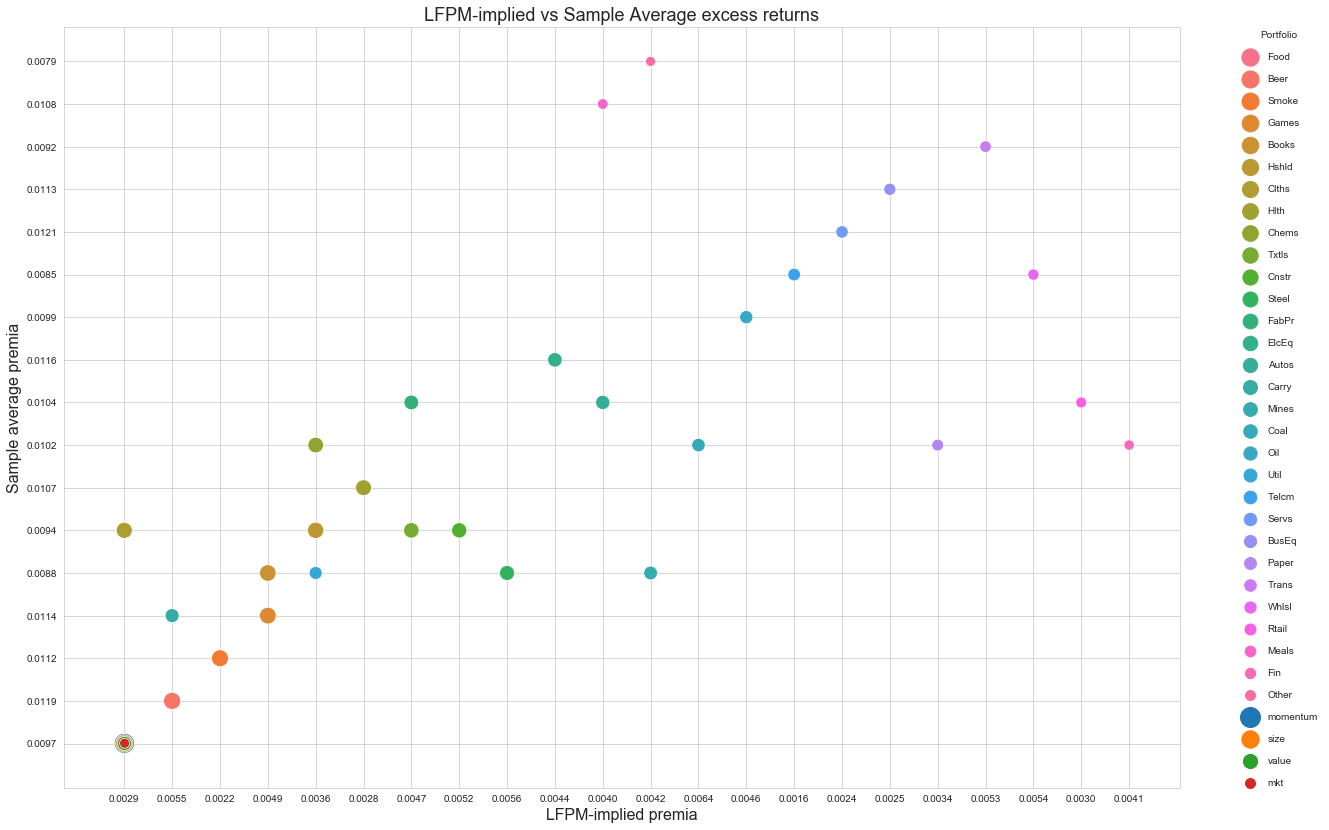

In [77]:
fig, ax = plt.subplots(figsize= (20,14))
sns.scatterplot(y='Sample average of the excess return', x='LFPM-implied excess return', 
                    data=ret_df, hue=ret_df.index, size=ret_df.index, 
                sizes=(100, 300), legend='full')

sns.scatterplot(y='factors1', x='factors2', data=factors_df,
               hue=factors_df.index, size=factors_df.index, sizes=(100, 400), legend='full')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1.3, title='Portfolio', 
          bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('LFPM-implied vs Sample Average excess returns', fontsize=18)
ax.set_xlabel("LFPM-implied premia",fontsize=16)
ax.set_ylabel("Sample average premia",fontsize=16)

## 3.6. Report the mean-absolute-error of the LFPM:

In [76]:
mae = sum(reg_results["alpha"].abs())/len(reg_results["alpha"])

printmd('**Mean Absolute Error (MAE) of the LFPM = {:.6f}**'.format(mae), color='blue')

<span style='color:blue'>**Mean Absolute Error (MAE) of the LFPM = 0.005960**</span>

## 3.7. You have estimated the 4-factor model for the 30 test assets. Estimate the CAPM on these 30 securities. Compare the MAE from the CAPM to the MAE from the 4-factor model.

In [79]:
regr_market = pd.DataFrame(index = industry_df.columns, columns = ["beta", "alpha", "r-squared"])
rhs = sm.add_constant(portfolios_df["mkt_excess"])
ave_excess_mkt_ret = 12 * portfolios_df["mkt_excess"].mean() 
for portfolio in reg_results.index:
    lhs = portfolios_df[portfolio]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    regr_market.loc[portfolio, 'beta'] = res.params["mkt_excess"]
    regr_market.loc[portfolio, 'alpha'] = res.params['const']
    regr_market.loc[portfolio, 'r-squared'] = res.rsquared
regr_market.head()

,beta,alpha,r-squared
Food,0.72651,0.00687927,0.677836
Beer,0.925656,0.00834513,0.484118
Smoke,0.618003,0.00884007,0.322786
Games,1.37637,0.00609585,0.683376
Books,1.09669,0.00456223,0.67604


In [82]:
CAPM_df = pd.DataFrame()
CAPM_df = pd.DataFrame(index = regr_market.index, columns=['CAPM-implied excess return'])
for portfolio in regr_market.index:
    CAPM_df.loc[portfolio] = regr_market.loc[portfolio]['beta']*lambda_momFF
printmd('**CAPM-implied expected excess return for each test portfolio:**',color='blue')    
display(CAPM_df.head(3))

print()
printmd('**Mean Absolute Error (MAE) of the LFPM = {:.6f}**'.format(mae), color='blue')
printmd('**Mean Absolute Error (MAE) of the CAPM = {:.6f}**'.format(sum(regr_market["alpha"])/len(regr_market["alpha"])), color='blue')

<span style='color:blue'>**CAPM-implied expected excess return for each test portfolio:**</span>

,CAPM-implied excess return
Food,0.00482051
Beer,0.00614188
Smoke,0.00410055


<span style='color:blue'>**Mean Absolute Error (MAE) of the LFPM = 0.005960**</span>

<span style='color:blue'>**Mean Absolute Error (MAE) of the CAPM = 0.006145**</span>

**How much do the extra factors help in explaining risk premia for these 30 industry portfolios?**

In [83]:
printmd("**The extra factors in the LFPM barely helped explaining the risk premia, because the MAE from the two models are very similiar.**", color = "blue")

<span style='color:blue'>**The extra factors in the LFPM barely helped explaining the risk premia, because the MAE from the two models are very similiar.**</span>